[4.17258780e-11 5.25297681e-15 1.41385699e-18 1.20338747e-21
 3.23895924e-24 4.07760810e-26 8.71777154e-28]


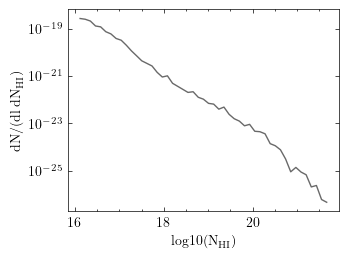

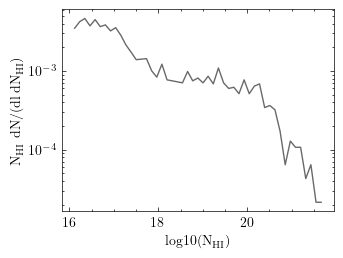

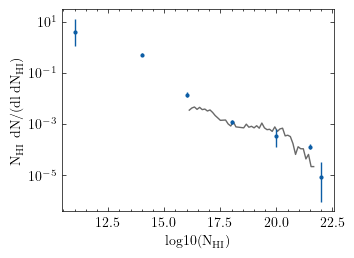

In [4]:
import os
import numpy as np
from matplotlib import pyplot as plt      
import pandas as pd
from scipy import special                 
import array
import scipy as sp
import scipy.interpolate
import re
import pickle as pickle
from matplotlib.pyplot import figure
with open('color_data0_cul_integral.pkl', 'rb') as f:
    lyman = pickle.load(f)
with open('color_data1_cul_integral.pkl', 'rb') as f:
    lyman1= pickle.load(f)
lyman_limited_value = []
for i in lyman:
        lyman_limited_value.append(i[0][0][-1])
for i in lyman1:
        lyman_limited_value.append(i[0][0][-1])
lyman_limited_value_sorted = sorted(lyman_limited_value)
min_value_lyman_limited_value = np.log10(min(lyman_limited_value_sorted))
max_value_lyman_limited_value = np.log10(max(lyman_limited_value_sorted))
bins = np.linspace(min_value_lyman_limited_value,max_value_lyman_limited_value,51)
bin_data = pd.DataFrame()
bin_data['cut_lyman_limited'] = np.array(lyman_limited_value_sorted)
bin_data['cut_lyman_limited'] = pd.cut(np.log10(bin_data['cut_lyman_limited']), bins = bins,include_lowest = True).astype(str)
number_count = []
for i in range(1, len(bins)):
    number_count.append(0)
    for k in range(0,len(lyman_limited_value_sorted)):
        if(np.log10(lyman_limited_value_sorted[k]) < bins[i]):
            number_count[i-1] += 1

number_count2 = []
for i in range(1,len(number_count)):
    number_count2.append(number_count[i] - number_count[i-1])

d_N_column= []
for i in range(1,50):
    d_N_column.append(10**bins[i]-10**bins[i-1])
dl = (200*1000)
y_value = []
for i,k in zip(number_count2,d_N_column):
    y_value.append(i/(dl*(k)))

x_value = []
for i in range(1,50):
    x_value.append(bins[i])

with plt.style.context('science','notebook'):
    plt.figure()    
    plt.plot(x_value,y_value,color = "dimgray")
    plt.rcParams['font.size'] = 8
    plt.yscale("log") 
    plt.yticks()
    plt.xlabel("$\mathrm{log10(N_{HI})}$",fontsize = 10)
    plt.ylabel("$\mathrm{dN/(dl\: dN_{HI})}$",fontsize =10,)
    plt.savefig("f1_cul.pdf")



y_axis = (np.multiply(np.power(10,x_value),y_value))


with plt.style.context('science','notebook'):
    plt.figure()    
    plt.plot(x_value,y_axis,color = "dimgray")
    plt.rcParams['font.size'] = 8
    plt.yscale("log") 
    plt.yticks()
    plt.xlabel("$\mathrm{log10(N_{HI})}$",fontsize = 10)
    plt.ylabel("$\mathrm{N_{HI}}$ $\mathrm{dN/(dl\: dN_{HI})}$",fontsize =10,)
    plt.savefig("f1_overplotting_cul.pdf")
 
#observational data
column_density_spacing = [10**11,10**14,10**16,10**18,10**20,10**21.5,10**22]
x_axis_2= [11.0,14.0000,16,18,20,21.5,22]
median = [10**-8.4,10**-12.3,10**-15.87,10**-18.94,10**-21.51,10**-23.41,10**-25.08]
mean = [10**-8.38,10**-12.30,10**-16.00,10**-19.12,10**-21.20,10**-23.60,10**-24.94]
percentile_16th  = [10**(-8.38-.5),10**(-12.3-0.07),10**(-16.0-0.14),10**(-19.12-0.11),10**(-21.2-0.16),10**(-23.60-0.13),10**(-24.94-0.46)]
percentile_84th  = [10**(-8.38+.5),10**(-12.3+0.07),10**(-16.0+0.14),10**(-19.12+0.11),10**(-21.2+0.16),10**(-23.60+0.13),10**(-24.94+0.46)]
stuff = np.multiply(column_density_spacing,mean)
upper_bounds = np.multiply(np.subtract(percentile_84th, mean),column_density_spacing)
lower_bounds =  np.subtract(np.multiply(mean,column_density_spacing),np.multiply(percentile_16th,column_density_spacing))
scale_factor = (1+5.8)**2 *68/3e5
lower_bound = []
for i in lower_bounds:
    lower_bound.append(float(i))
upper_bound = []
for i in upper_bounds:
    upper_bound.append(float(i))
error = [lower_bound, upper_bound]
median_scaled = np.multiply(median,scale_factor)
error_scaled = np.multiply(error,scale_factor)

with plt.style.context('science','notebook'):
    plt.figure()    
    plt.plot(x_value,y_axis,color = "dimgray")
    plt.rcParams['font.size'] = 8 
    print(median_scaled)
    plt.errorbar(x_axis_2, np.multiply(median_scaled,column_density_spacing),yerr = error_scaled,fmt="o",ms=2)
    plt.yscale("log")
    plt.yticks()
    plt.xlabel("$\mathrm{log10(N_{HI})}$",fontsize = 10)
    plt.ylabel("$\mathrm{N_{HI}}$ $\mathrm{dN/(dl\: dN_{HI})}$",fontsize =10)
    plt.savefig("simple_fit_cul.pdf")


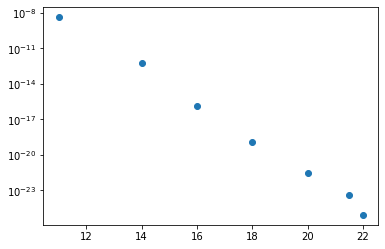

In [8]:
plt.scatter(x_axis_2,median)
plt.yscale("log")

In [9]:
column_density_spacing

[100000000000,
 100000000000000,
 10000000000000000,
 1000000000000000000,
 100000000000000000000,
 3.1622776601683794e+21,
 10000000000000000000000]

In [10]:
print(x_value)
print(y_axis)

[16.116112341773917, 16.231732489092252, 16.34735263641059, 16.462972783728926, 16.578592931047265, 16.6942130783656, 16.80983322568394, 16.925453373002274, 17.041073520320612, 17.156693667638947, 17.272313814957286, 17.38793396227562, 17.50355410959396, 17.619174256912295, 17.734794404230634, 17.85041455154897, 17.966034698867308, 18.081654846185643, 18.19727499350398, 18.312895140822317, 18.428515288140655, 18.54413543545899, 18.65975558277733, 18.775375730095668, 18.890995877414003, 19.006616024732338, 19.122236172050677, 19.237856319369016, 19.35347646668735, 19.46909661400569, 19.584716761324025, 19.700336908642363, 19.8159570559607, 19.931577203279037, 20.047197350597372, 20.16281749791571, 20.278437645234046, 20.394057792552385, 20.50967793987072, 20.62529808718906, 20.740918234507394, 20.856538381825732, 20.972158529144068, 21.087778676462406, 21.203398823780745, 21.31901897109908, 21.434639118417415, 21.550259265735754, 21.665879413054093]
[3.48687750e-03 4.23559353e-03 4.6420